In [1]:
import sys
import os
path_pipest = os.path.abspath('./')
n=0
while (not os.path.basename(path_pipest)=='pipest') and (n<4):
    path_pipest=os.path.dirname(path_pipest)
    n+=1 
if not os.path.basename(path_pipest)=='pipest':
    print("path_pipest not found. Instead: {}".format(path_pipest))
    raise ValueError("path_pipest not found.")
path_models=path_pipest+'/models'    
path_sdhawkes=path_pipest+'/sdhawkes'
path_modelling = path_sdhawkes+'/modelling'
path_resources = path_sdhawkes+'/resources'
path_lobster=path_pipest+'/lobster'
path_lobster_data=path_lobster+'/data'
path_lobster_pyscripts=path_lobster+'/py_scripts'
path_tests = path_pipest+'/tests'
path_saved_tests = path_tests+'/saved_tests'
path_perfmeas=path_tests+'/performance_measurements'
sys.path.append(path_modelling)
sys.path.append(path_resources)
sys.path.append(path_perfmeas)
import numpy as np
import pandas as pd
import pickle
import datetime
import time
import datetime
import timeit
import model as sd_hawkes_model
import computation
import plot_tools

openmp.omp_get_max_threads(): 4


In [2]:
import matplotlib.pyplot as plt

In [3]:
symbol="INTC"
date="2019-01-23"
time_window="41400-45000"

In [4]:
with open(path_models+"/{}/{}_{}/{}_sdhawkes_{}_{}"
          .format(symbol, symbol, date, symbol, date, time_window), 'rb') as source:
    calmodel=pickle.load(source)

In [5]:
model=sd_hawkes_model.SDHawkes(
    number_of_event_types=calmodel.number_of_event_types,
    list_of_n_states=calmodel.state_enc.list_of_n_states,
    number_of_lob_levels=calmodel.n_levels,
    volume_imbalance_upto_level=\
    calmodel.volume_enc.volume_imbalance_upto_level
)

In [6]:
model.get_configuration(calmodel)

Copying data from given model
mle_estimation.EstimProcedure is being initialised
I am storing dirichlet parameters
Dirichlet parameters have been estimated and store. run_time=0.28963208198547363
I am storing transition probabilities
Transition probabilities have been estimated and store. run_time=0.0031824111938476562
EstimProcedure has been successfully initialised
Hawkes parameters have been set
18 state-event pairs are not associated with a distribution of state updates
SDHawkes: asymmetry in transition_probabilities = 15.13647764773585
Transition probabilities have been set
Producing proposal density for rejection sampling.


/home/claudio/anaconda3/envs/pipest/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


Dirichlet parameters have been set
Calibration is being performed on the following machine:
 posix.uname_result(sysname='Linux', nodename='elitebook', release='5.3.0-61-generic', version='#55~18.04.1-Ubuntu SMP Mon Jun 22 16:40:20 UTC 2020', machine='x86_64')


In [7]:
model.create_uq()

In [8]:
# num_iter=10
# max_number_of_events=10000
# target=computation.avg_rates(model.data.number_of_event_types, 
#                             model.data.observed_times,
#                             model.data.observed_events, partial=False)
# model.uncertainty_quantification.adjust_baserates(
#     target,
#     adj_coef=5.0e-2,
#     num_iter=num_iter, 
#     max_number_of_events=max_number_of_events
# )

In [9]:
nu=np.array([0.2088, 0.1907, 10.57, 9.07])
model.set_base_rates(nu)

In [10]:
model.reduce_price_volatility(reduction_coef=0.5)

SDHawkes: asymmetry in transition_probabilities = 4.5365804291870155
Transition probabilities have been set


In [11]:
# model.create_goodness_of_fit(type_of_input='empirical')

In [12]:
time_start=0.0
time_end=time_start+0.15*60*60

In [13]:
model.simulate(time_start, time_end,
               max_number_of_events=20000,
               add_initial_cond=True,
               store_results=True, report_full_volumes=False)

Simulation is being performed on the following machine:
 posix.uname_result(sysname='Linux', nodename='elitebook', release='5.3.0-61-generic', version='#55~18.04.1-Ubuntu SMP Mon Jun 22 16:40:20 UTC 2020', machine='x86_64')
SDHawkes.simulate: initial conditions have been acknowledged
I am adding initial conditions on the negative time axis
simulate: start of initialisation
   Number of levels in the order book: 2
   number_of_initial_events=61
 simulate: labelled_times and count have been initialised.
 simulate: intensities have been initialised.
  intensities at start: [ 0.20880385  0.19070774 10.57000019  9.07000002]
  intensity_overall at start: 20.039511802706002
simulate: start of simulation
  time_start=0.0,  time at start =0.0
 Simulation terminates. time at end =489.45983678996214,  num_of_event=20061
End of simulation. run_time=30.8 seconds


In [14]:
# model.store_history_of_intensities(density_of_eval_points=1000)

In [15]:
# model.plot_events_and_states(t_0=28.5,t_1=45.0)

In [16]:
# model.plot_events_and_states()

In [17]:
# model.plot_intensities()

In [18]:
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1],
                             ticksize=model.data.ticksize)
model.store_price_trajectory(type_of_input='empirical', initial_price=model.data.mid_price.iloc[0,1],
                             ticksize=model.data.ticksize)

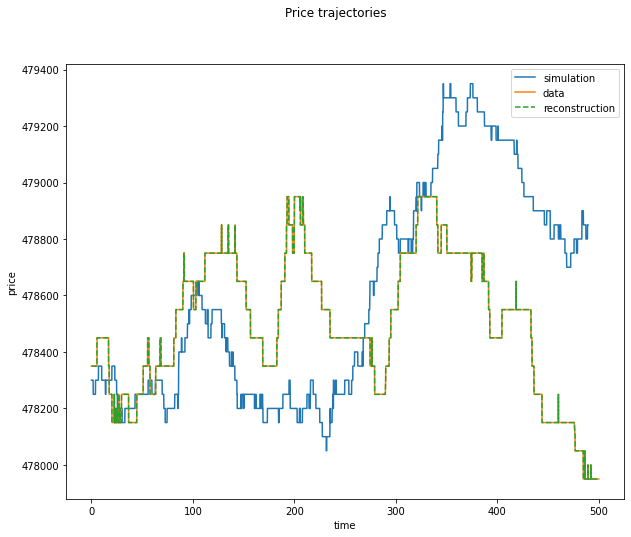

[ 0.2088  0.1907 10.57    9.07  ]


In [28]:
model.plot_price_trajectories(T=500.0)
print(model.base_rates)

In [20]:
# model.goodness_of_fit.qq_plot_residuals()

In [21]:
stop here


SyntaxError: invalid syntax (<ipython-input-21-a96ba3aab008>, line 1)

In [25]:
model.enforce_symmetry_in_transition_probabilities()

SDHawkes: new asymmetry in transition_probabilities = nan


/home/claudio/anaconda3/envs/pipest/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


# Liquidation

In [ ]:
initial_condition_times=np.array(model.simulated_times,copy=True)
initial_condition_events=1+np.array(model.simulated_events,copy=True)
initial_condition_states=np.array(model.simulated_states,copy=True)
initial_condition_volumes=np.array(model.simulated_volume,copy=True)

In [ ]:
model.base_rates

In [ ]:
initial_inventory=4.0
liquidator_base_rate=0.150
type_of_liquid = 'with_the_market' #constant_intensity or with_the_market or against_the_market
liquidator_control_type='fraction_of_bid_side' # fraction_of_inventory or fraction_of_bid_side
liquidator_control=0.2
time_start=float(initial_condition_times[-1])
time_end=time_start+0.05*60*60

In [ ]:
model.setup_liquidator(initial_inventory=initial_inventory,
                       time_start=time_start,
                       liquidator_base_rate=liquidator_base_rate,
                       type_of_liquid=type_of_liquid,
                       liquidator_control_type=liquidator_control_type,
                       liquidator_control=liquidator_control)

In [ ]:
model.liquidator.print_info()

In [ ]:
model.simulate_liquidation(
    time_end,
    initial_condition_events=initial_condition_events,
    initial_condition_states=initial_condition_states,
    initial_condition_times=initial_condition_times,
    initial_condition_volumes=initial_condition_volumes,
    verbose=False,
    report_history_of_intensities = False,
    store_results=True
)

In [ ]:
model.liquidator.print_info()

In [ ]:
model.make_start_liquid_origin_of_times(delete_negative_times=False)

In [ ]:
model.create_impact_profile(delete_negative_times=False,
                            produce_weakly_defl_pp=False,
                            maxiter=10, num_init_guesses=1)

In [ ]:
model.liquidator.impact.store_bm_impact()

In [ ]:
model.store_price_trajectory(type_of_input='simulated', initial_price=model.data.mid_price.iloc[0,1],
                             ticksize=model.data.ticksize)

In [ ]:
model.store_history_of_intensities()

In [ ]:
model.plot_bm_impact_profile(time_start=-5.0, time_end=60.0, plot_bm_intensity=True)

In [ ]:
model.plot_events_and_states(t_0=-5.5,t_1=150.0, first_event_index=0)

In [ ]:
model.plot_price_trajectories(T=750.0)